In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('adyen-dataset.csv')

# data dictionary

psp_reference: id unique of transaction
merchant: merchant type (industry: A,B,C,D,E), different proportion
card_scheme: (Amex, Visa, Mastercard, Other), different proportion
is_credit: (creditcard: 0.73, non-creditcard: 0.27)
eur_amount: skewed distribution (70% < 100 eur)
ip_country: [GR: GREECE, BR: BRAZIL, NL: NETHERLANDS, ZW: Zimbabwe, IT: ITALY]
issuing_country: [GR: GREECE, BR: BRAZIL, NL: NETHERLANDS, ZW: Zimbabwe, IT: ITALY]
device_type: [MAC, Android, IOS, Windows, Linux, Other] equivalent proportion
ip_address: some missing values, duplicated entries present
email_address: some missing values, duplicated entries present
card_number: duplicated entries present
shopper_interaction: (E-commerce 91%, POS 9%) all fraud happens to E-commerce
zip_code: 16 different zip codes
card_bin: 13 different banks

Missing value columns: ip_address, email_address. zip_code

In [2]:
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,GR,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,BR,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,NL,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,NL,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,BR,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138701 entries, 0 to 138700
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   psp_reference           138701 non-null  int64  
 1   merchant                138701 non-null  object 
 2   card_scheme             138701 non-null  object 
 3   year                    138701 non-null  int64  
 4   hour_of_day             138701 non-null  int64  
 5   minute_of_hour          138701 non-null  int64  
 6   day_of_year             138701 non-null  int64  
 7   is_credit               138701 non-null  bool   
 8   eur_amount              138701 non-null  float64
 9   ip_country              138701 non-null  object 
 10  issuing_country         138701 non-null  object 
 11  device_type             138701 non-null  object 
 12  ip_address              110961 non-null  object 
 13  email_address           124831 non-null  object 
 14  card_number         

In [113]:
df['merchant'].value_counts(normalize=True)

Merchant A    0.399017
Merchant D    0.200575
Merchant B    0.199652
Merchant E    0.100850
Merchant C    0.099906
Name: merchant, dtype: float64

In [114]:
df['card_scheme'].value_counts(normalize=True)

Visa          0.348181
MasterCard    0.301368
Other         0.249111
Amex          0.101340
Name: card_scheme, dtype: float64

In [4]:
df["is_credit"].value_counts(normalize=True)

True     0.730579
False    0.269421
Name: is_credit, dtype: float64

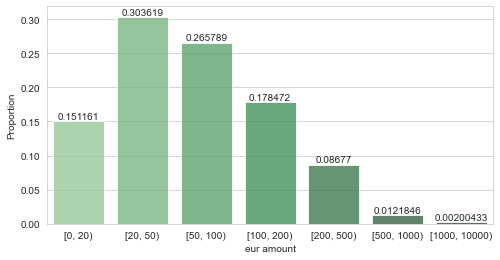

In [67]:
df_eur_amount = pd.cut(df.eur_amount, [0,20,50,100,200,500,1000,10000],right=False)
value_counts = df_eur_amount.value_counts(normalize=True)
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.set_color_codes("muted")
ax = sns.barplot(x=value_counts.index, y=value_counts.values,alpha=0.8,palette=("Greens_d"))
ax.set_xlabel('eur amount')
ax.set_ylabel('Proportion')
ax.bar_label(ax.containers[0])
plt.show()

In [68]:
df['ip_country'].unique()

array(['GR', 'BR', 'NL', 'ZW', 'IT'], dtype=object)

In [111]:
df['ip_country'].value_counts(normalize=True)

NL    0.287172
BR    0.217951
ZW    0.208499
GR    0.207771
IT    0.078608
Name: ip_country, dtype: float64

In [69]:
df['issuing_country'].unique()

array(['GR', 'BR', 'NL', 'ZW', 'IT'], dtype=object)

In [74]:
df[df['issuing_country'] != df['ip_country']]

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen


In [110]:
df['device_type'].unique()

array(['MacOS', 'Android', 'iOS', 'Other', 'Windows', 'Linux'],
      dtype=object)

In [112]:
df['device_type'].value_counts(normalize=True)

Other      0.177886
Windows    0.165961
MacOS      0.164462
Linux      0.164418
Android    0.164144
iOS        0.163128
Name: device_type, dtype: float64

In [95]:
df[df['ip_address'].duplicated()][['ip_address','has_fraudulent_dispute']]

,ip_address,has_fraudulent_dispute
7,NaN,True
13,NaN,True
18,NaN,True
25,NaN,False
31,NaN,False
...,...,...
138696,947PJ1zh6yFwZxGOYG8Lnw,True
138697,NaN,False
138698,-mT_MQEgvNfb5RkbW0oejw,False
138699,13Jg3lRGPEoM3c_vLM-SVQ,True


In [97]:
df[df['ip_address'].duplicated()][['ip_address','has_fraudulent_dispute']].groupby('ip_address').sum().sort_values(by="has_fraudulent_dispute",ascending=False)

,has_fraudulent_dispute
ip_address,
nzKBxRDpQNoWtCGpb6KDBQ,32
3Cwu5_lVTmRIisW87oZm1A,32
yV7nl_JGU6rMLunl8kx8Og,26
iP7XWoa8wOeObF3rF4LxyA,25
YVIelrrudnhD6ExnVNNrHA,24
...,...
Kx9EVbbk1_7CmUaK13wtvA,0
KwvUylNRfmChtXSbTNxy8g,0
Kwbqv0-94sNsPEFlfAn4Qw,0


In [134]:
new_df = df[df['email_address'].duplicated()][['email_address','eur_amount','has_fraudulent_dispute']].groupby('email_address').agg({'eur_amount':'mean','has_fraudulent_dispute':'sum'}).sort_values(by="has_fraudulent_dispute",ascending=False)
new_df[new_df['has_fraudulent_dispute'] >= 1]

,eur_amount,has_fraudulent_dispute
email_address,,
n9iW182FS26i7RZ1ZQQsiA,109.177089,52
RYWijttPHGy-YCyhxFKc2g,113.197143,34
AsGDA0u3ReB45qkhf3rU5A,96.694821,33
TH99ne6aeXzcpAXZdIjKmA,96.205435,31
y6sow_WvxmjUzdbPiAaG7A,89.104915,31
...,...,...
ndisrzxdK5tWh8X3YvBEBw,19.380000,1
sjq_33Owj3xP55vsb-Wcbw,157.950000,1
VtDZPMdX59vKGpyHkLO9ZQ,104.193333,1


In [135]:
new_df = df[df['card_number'].duplicated()][['card_number','has_fraudulent_dispute']].groupby('card_number').sum().sort_values(by="has_fraudulent_dispute",ascending=False)
new_df[new_df['has_fraudulent_dispute'] >= 1]

,has_fraudulent_dispute
card_number,
gLZvKVK0zdRzRlhufrrZjQ,49
tILz9SCTB-jZcC3KBe1tgA,38
AJWnL6gryOz8O6hm1jsbxg,35
5YoeBI22nfwwEYpD8iI24Q,35
PM14M6gMRcjxYFG3F7vEaw,32
...,...
9MLrbEwRrcr79BnY0fTFGQ,1
dMBHTs8HcY3BeM7QN_houw,1
yOTREwh7NOytNXX2dZR6gQ,1


In [106]:
df['shopper_interaction'].value_counts(normalize=True)

Ecommerce    0.911046
POS          0.088954
Name: shopper_interaction, dtype: float64

In [108]:
df['zip_code'].value_counts(normalize=True)

2039    0.145840
FFR     0.109227
ZB      0.108335
FGDD    0.108179
1104    0.090244
BZD     0.070635
BB      0.061918
XDED    0.061762
1093    0.037904
3941    0.037684
XOL     0.028858
EB      0.028725
DFFF    0.027958
AAD     0.027825
EGHA    0.027598
DB      0.027309
Name: zip_code, dtype: float64

In [109]:
df['card_bin'].value_counts(normalize=True)

4556    0.210662
4916    0.158716
4571    0.105479
4645    0.053720
4133    0.053338
4802    0.052905
4891    0.052747
4532    0.052667
4920    0.052667
4526    0.052624
4017    0.052314
4236    0.051218
4622    0.050944
Name: card_bin, dtype: float64